# Выявление закономерностей, которые определяют успешность игры 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   
Данные за 2016 год могут быть неполными. 

## Откройте файл с данными и изучите общую информацию

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [273]:
#data.hist(figsize=(15, 20))
#plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Мы видим, что всего в каждом столбце должно быть 16715 строк. В столбцах: Critic_Score (оценка критиков), Name (название игры), Year_of_Release (год выпуска), Genre (жанр), User_Score (оценка пользователей), Rating (рейтинг от организации ESRB) - есть пропуски. Даны стоблцы с типами данных object, float64.

## Подготовьте данные
1) Замените названия столбцов (приведите к нижнему регистру);  
2) Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
3) Обработайте пропуски при необходимости:  
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
- Опишите причины, которые могли привести к пропускам;  
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать; 

4) Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  

In [275]:
#сделаем названия столбцов в нижнем регистре
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В каких столбцах нам надо поменять тип данных: year_of_release, na_sales, eu_sales, jp_sales, other_sales, critic_score, rating - это те столбцы, которые нам понадобятся в целочисленном виде в int.  
В столбце user_score - есть аббревиатура 'tbd' (рейтинг еще не сформирован, так как достаточное количетсво играков n еще не сыграло в эти игрули, рейтинг только в скором времени сформируется), эти пропуски мы заменим на Nan.  
Сначала поменяем тип у тех столбцов, у которых нет пропусков.   

In [276]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [277]:
#преобразуем в нужные типы
#data['na_sales'] = data['na_sales'].astype(int)
#data['eu_sales'] = data['eu_sales'].astype(int)
#data['jp_sales'] = data['jp_sales'].astype(int)
#data['other_sales'] = data['other_sales'].astype(int)

In [278]:
#data.info()

Теперь разберемся с теми колонками, где есть пропуски. Прежде чем поменять у них тип данных, надо заполнить пропуски.

In [279]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [280]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

В этом столбце user_score пропуски оставим как есть.

Пропусков в столбце year_of_release не очень много - можно их удалить. Так как логически мы никак не сможем заполнить года выпуска игр. И сразу же поменяем тип данных.

In [281]:
data = data.dropna(subset=['year_of_release'])
display(data['year_of_release'].isna().sum())

0

In [282]:
#меняем тип у года релиза
#data['year_of_release'] = pd.to_numeric(data['year_of_release'],downcast="integer",errors='coerce')
data['year_of_release'] = data['year_of_release'].astype(int)
#data.info()

Так же мало пропусков в столбце name, их тоже удалим.

In [283]:
data = data.dropna(subset=['name'])
display(data['name'].isna().sum())
#data.info()

0

In [284]:
#data['user_score'] = data['user_score'].astype(float)

In [285]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Дальше проблема, мы не можем никак логически заполнить пустые пропуски у оценок и рейтингов (critic_score, user_score, rating). Так как эти данные не зависят ни от одного столбца.  
Пропуски могли появится по человеческим причинам и механическим. Когда сгружали данные что-то пошло не так, если человек сам какие то данные забивал, то сыграл человеческий фактор и просто пропустили значение. У столбца user_score пропуски, так как не достаточно еще человек поставило рейтинги, не достаточно играков еще прошли игру, чтобы сформировался рейтинг. Организации ESRB могли по какой то причине не поставить рейтинг возрастной. 

Явных дубликатов нет.

In [287]:
data.duplicated().sum()

0

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец. Складываем три столбца и сохраняем в новый столбец.

In [288]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Проведите исследовательский анализ данных
1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
- Не учитывайте в работе данные за предыдущие годы.  

3) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
4) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
5) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
6) Соотнесите выводы с продажами игр на других платформах.  
7) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр выпускалось в разные годы

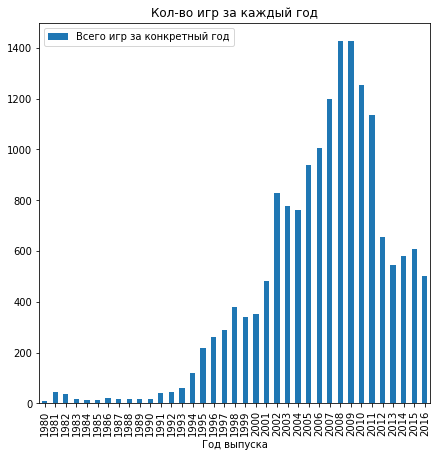

,Названия игр,Всего игр за конкретный год
Год выпуска,,
1980,AsteroidsMissile CommandKaboom!DefenderBoxingI...,9
1981,Pitfall!FroggerDemon AttackE.T.: The Extra Ter...,46
1982,Pac-ManDig DugMario Bros.Pole PositionMoon Pat...,36
1983,BaseballMario Bros.MahjongPitfall II: Lost Cav...,17
1984,Duck HuntExcitebikeGolfTennisPinballXeviousF1 ...,14
1985,Super Mario Bros.Kung FuSoccerIce ClimberGyrom...,14
1986,The Legend of ZeldaWorld Class Track MeetMetro...,21
1987,Zelda II: The Adventure of LinkMike Tyson's Pu...,16
1988,Super Mario Bros. 3Super Mario Bros. 2TetrisDr...,15


In [289]:
data_grouped_year = data.pivot_table(index=['year_of_release'], values='name', aggfunc=['sum', 'count'])
#data_grouped_year = data_grouped_year.reset_index()
data_grouped_year.index.name = 'Год выпуска'
data_grouped_year.columns = ['Названия игр', 'Всего игр за конкретный год']
data_grouped_year.plot(figsize=(7, 7), kind='bar', legend=True)
plt.title('Кол-во игр за каждый год')
plt.show()
display(data_grouped_year)

Чтобы построить прогноз на 2017 год нам явно не нужны все периоды. Далее поймем какие года можно будет отбросить. А пока всех больше игр выпускали в 2008-2009 году, потом идет спад.

### Как менялись продажи по платформам
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [290]:
data_sort_sales_platform = (data.
                     pivot_table(index = ['platform'], values = ['all_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('all_sales', ascending = False)).head(10)
display(data_sort_sales_platform)


,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Получили топ платформ по суммарным продажам.

,platform,year_of_release,sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


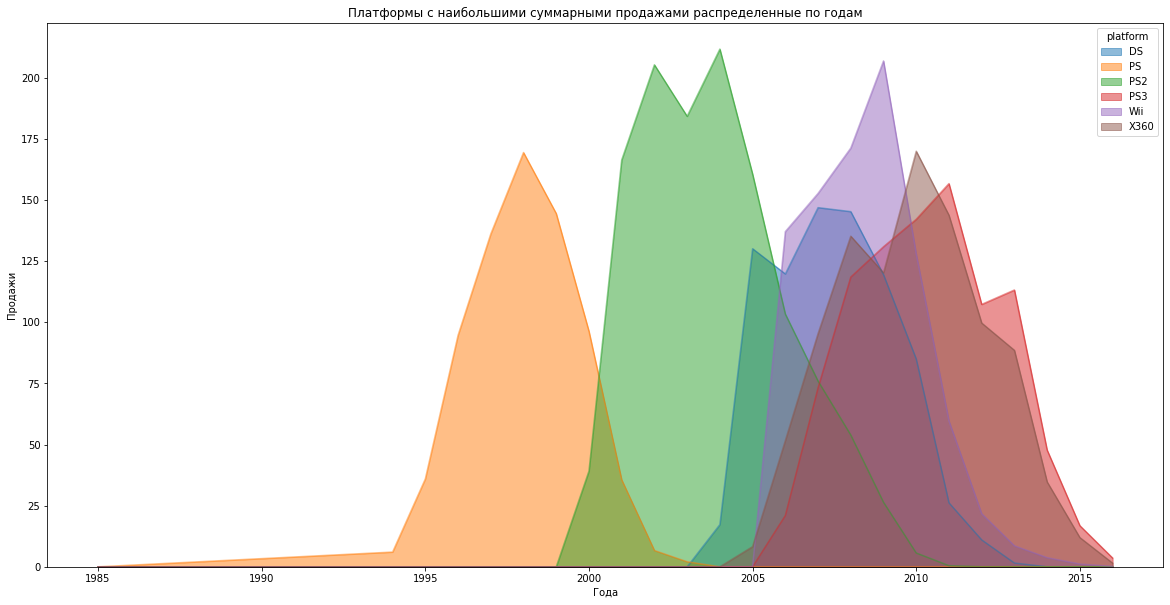

In [291]:
data_grouped_sales_platform = data.groupby(['platform','year_of_release']).agg(sales=('all_sales', 'sum'))
#display(data_grouped_sales_platform)
data_grouped_sales_platform = (data.loc[(data['platform'] == 'Wii')
              | (data['platform'] == 'X360')
              | (data['platform'] == 'PS2')
              | (data['platform'] == 'DS')
              | (data['platform'] == 'PS3')
              | (data['platform'] == 'PS')].groupby(['platform','year_of_release']).agg(sales=('all_sales', 'sum')))
data_grouped_sales_platform = data_grouped_sales_platform.reset_index()
display(data_grouped_sales_platform)
data_grouped_sales_platform.pivot_table(columns='platform', index='year_of_release', values='sales').plot(kind='area', figsize=(20, 10), stacked = False)
#data_grouped_sales_platform.plot(figsize=(7, 7), kind='bar', grid=True, legend=True) #x='year_of_release', y='sales')
#data_grouped_sales_platform.plot(kind=hist, x='year_of_release', y='')
plt.title('Платформы с наибольшими суммарными продажами распределенные по годам')
plt.xlabel('Года')
plt.ylabel('Продажи')
plt.show()

На графике мы видим, что PS появилась в 1994 году и активно развивалась до 2002 года, потом её заменил PS2, вышедший в 2000 году, он поддерживался до 2008 года где-то. Затем появился DS (Nintendo DS) в 2004 и поддерживался до 2013 аж, потом вышел в продажи Wii (тоже от Nintendo) в 2005 и поддерживали эту консоль до 2014 года. Стоит заметить, что Wii вышла прям следом за DS, в разницу 1 год. Потом в год вместе с Wii вышел Xb360 в 2005 году и продержался до 2015 года. Затем вышла в 2006 году PS3 и поддерживалаьс до 2015 года. То, что есть значения ранее дат выхода платформ, может говорить о том, что люди делали предзаказы игр, т.е у каждой платформы есть какие то продажи до их выхода, а потом графики идут резко вверх, когда уже официально начались продажи. Я делала выводы по тем частям графиков, где резко начинались продажи у каждой платформы.    
Какой можно сделать из этого вывод:   
Первая PS была типа пробной, ее не перекрывают другие консоли, как бы она была в своем роде одна. Потом все раскусили фишку, и стали штамповать разные консоли одну за другой. Особенно это видно с платформами, которые пересекаются, а именно за DS тут же следует Wii, потом тут же выпускают Xb360 и PS3.  
Можно заметить закономерность еще в том, что как только анонсируют (или выпускают в продажу) новую игровую платформу, то предыдущие модели идут на спад, становится меньше покупаемых игр на старые модели.  
И в итоге мы имеем, в период от 1994-99 год имеем одну PS, затем в 2000 году выходит PS2, через 4 года появляется DS, потом через 1 год уже имеем Wii, далее в этот же год (2005) у нас есть уже Xb360, а через еще 1 год уже появлятеся PS3. Так как нас мало интересуют более старые модели, возьмем относительно не старые, когда начали выпускать игровые приставки год за годом. Тогда можно ответить, что раз в год появлялись новые приставки.   
Старые платформы получается исчезают за 8-9 лет, судя по PS, PS2, и DS.

### Возьмите данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Так как новые платформы появляются чуть ли не каждый год, но была платформа которая вышла через 4 года до выхода предыдущей, возьем для анализа последние 4 года (с 2011-2016). 

In [292]:
#df.loc[filter, column] = value
actual_data = data[(data['year_of_release'] >= 2012) & (data['year_of_release'] <= 2016)]
actual_data = actual_data.reset_index(drop=True)
display(actual_data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


### Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

,all_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


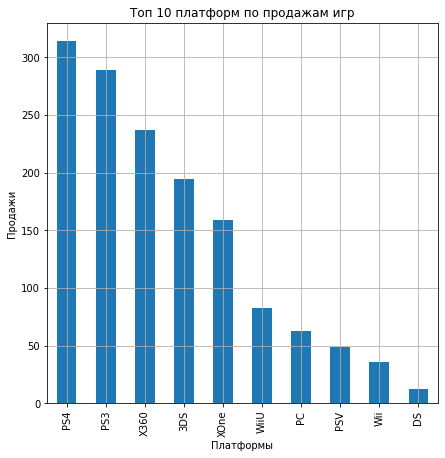

In [293]:
actual_data_top_all_sales = (actual_data.
                     pivot_table(index = ['platform'], values = ['all_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('all_sales', ascending = False)).head(10)
display(actual_data_top_all_sales)
actual_data_top_all_sales.plot(figsize=(7, 7), kind='bar', grid=True, legend=False)
plt.title('Топ 10 платформ по продажам игр')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

За период от 2011-2016 год мы получили, что PS4 самая прибыльная консоль. Это факт. После нее идет PS3, а потом уже Xb360, затем Nintendo 3DS и так далее по убывающей. Для дальнейшего исследования я возьму топ 5 консолей (PS4, PS3, X360, 3DS, XOne). 

In [294]:
actual_data_platform_top5 = actual_data[(actual_data['platform'] == 'PS4')
              | (actual_data['platform'] == 'PS3')
              | (actual_data['platform'] == '3DS')    
              | (actual_data['platform'] == 'X360')
              | (actual_data['platform'] == 'XOne')]
#display(actual_data_platform)

### Постройте график «ящик с усами» 
По глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 3.0)

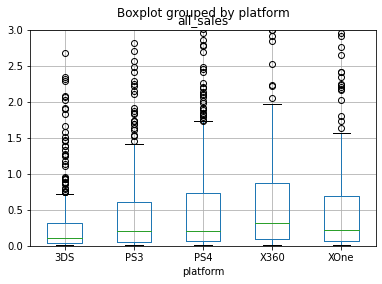

In [295]:
#actual_data_platform_top5_table = actual_data_platform_top5.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
#actual_data_platform_top5_table = actual_data_platform_top5_table.reset_index()
#display(actual_data_platform_top5_table.head())

actual_data_platform_top5.boxplot('all_sales', by='platform') #'all_sales', by='platform')
plt.ylim(0,3)


Мы видим, что у 3DS много выбросов, у PS3 тоже, как и у PS4. Самая большая медиана у X360. У всех смещены данные к вверхнему квартилю, а медиана смещена к нижнему кварилю. Минимальное значение всех выше у X360, как и максимальное. Получается платформа X360 более стабильная.

Далее для себя попробовала сделать ящик с усами по другому.

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

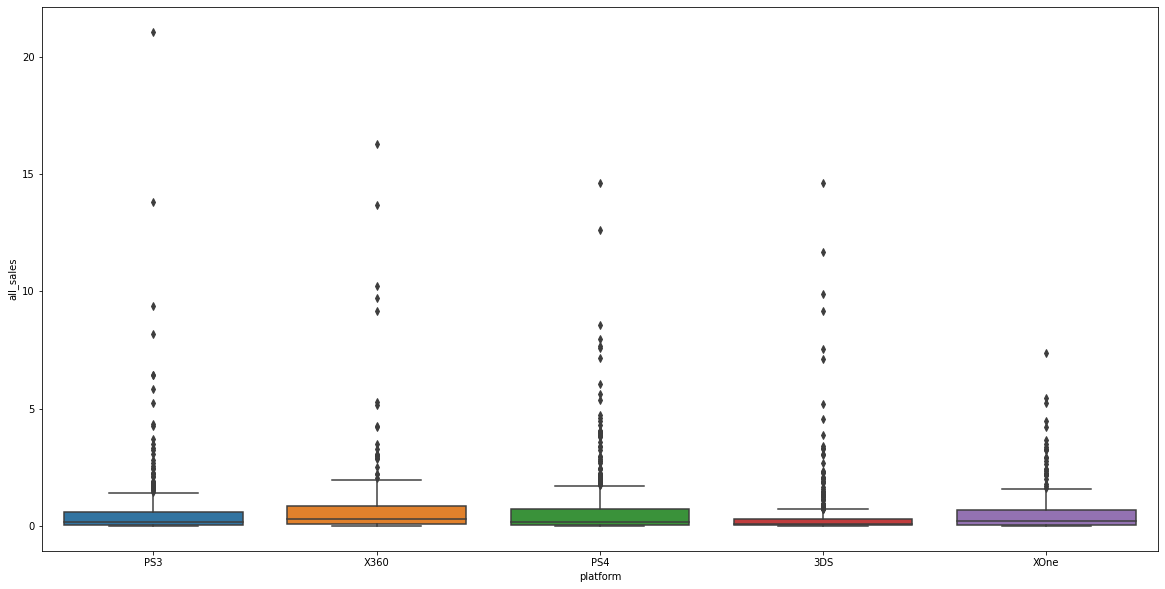

In [296]:
#display(actual_data_platform_top5)
plt.figure(figsize=(20, 10))
sns.boxplot(data = actual_data_platform_top5, y = 'all_sales', x='platform')
#plt.ylim(0,2.5)

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


,user_score,all_sales
0,1.5,20.0
1,1.9,6.0
2,2,23.0
3,2.3,1.0
4,2.7,24.0


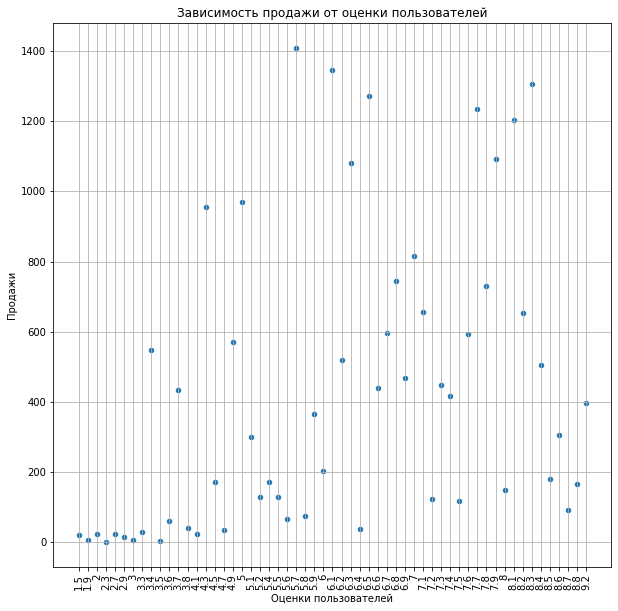

In [297]:
ps4 = actual_data[actual_data['platform'] == 'PS4']
#ps4_all_sales_user_score = ps4_all_sales_user_score.reset_index(drop=True)
display(ps4.head())
ps4_all_sales_user_score = ps4.pivot_table(index='user_score', values='all_sales', aggfunc = 'sum')
ps4_all_sales_user_score = ps4_all_sales_user_score.reset_index()
ps4_all_sales_user_score['all_sales'] = (ps4_all_sales_user_score['all_sales']*100).round(2)


#ps4_all_sales_user_score = ps4_all_sales_user_score.reset_index()
display(ps4_all_sales_user_score.head())

ps4_all_sales_user_score.plot(x='user_score', y='all_sales', kind='scatter', grid=True, figsize=(10, 10))
plt.title('Зависимость продажи от оценки пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

In [298]:
print((ps4['user_score'].astype('float64')).corr(ps4['all_sales']))

-0.031957110204556376


Мы видим, что корреляция отрицательная и очень близка к 0, а это говорит о том, что зависимость не линейная, более сложная.

,critic_score,all_sales
0,19.0,0.12
1,25.0,0.06
2,31.0,0.02
3,32.0,0.20
4,38.0,0.16


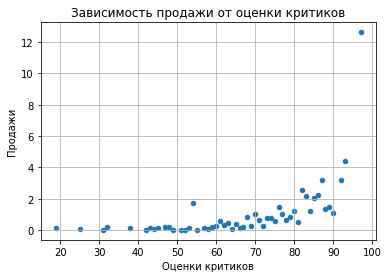

In [299]:
ps4_all_sales_critic_score = ps4.pivot_table(index='critic_score', values='all_sales')
ps4_all_sales_critic_score = ps4_all_sales_critic_score.reset_index()
display(ps4_all_sales_critic_score.head())

ps4_all_sales_critic_score.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
plt.title('Зависимость продажи от оценки критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

In [300]:
print(ps4['critic_score'].corr(ps4['all_sales']))

0.40656790206178095


Коэффициент положительный, но маловат, это говорит о том, что зависимость линейная есть, но слабая, и есть и выбивающие значения. Например при где-то оценки 54 есть увеличение продаж. Но все равно с ростом оценки критиков, продажи растут.

### Соотнесите выводы с продажами игр на других платформах.

Так как мы поняли, что на продажи хоть чучуть влияют именно оценки критиков, проделаем анализ для всех платформ операясь на оценки критиков.

In [301]:
def platform(num):
    x = actual_data.query('platform == @num')
    return x

for index in actual_data['platform'].unique():
    platform_group = platform(index)
    corr = platform_group['critic_score'].corr(platform_group['all_sales'])
    print(corr)

0.3314972592629587
0.3605734888507336
0.40656790206178095
0.3208028695360785
nan
0.4169983280084017
0.34837976012017485
-0.4243413011077494
0.23724324311567915
0.0944878992931617
nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Далее я провела самопроверку, чтобы убедиться, от куда взялись nan

In [302]:
print(actual_data['platform'].unique())

['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


In [303]:
DS = actual_data[actual_data['platform'] == 'DS']
display(DS.head())
print(DS['critic_score'].corr(DS['all_sales']))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN,8.06
331,Pokemon Conquest,DS,2012,Role-Playing,0.56,0.05,0.37,0.04,80.0,8.2,E,1.02
500,LEGO Batman 2: DC Super Heroes,DS,2012,Action,0.39,0.24,0.00,0.06,NaN,8,E10+,0.69
632,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN,0.51
761,Moshi Monsters: Moshlings Theme Park,DS,2012,Misc,0.03,0.33,0.00,0.04,NaN,NaN,E,0.40


nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Мы получили nan в тех корреляциях, где у платформ не стоят оценки критиков, там стоят просто NaN. 

А если взять уже ранее созданный actual_data_platform_top5 - топ 5 по продажам платформы за актуальный период, то выходит так:

In [304]:
def platform(num):
    x = actual_data_platform_top5.query('platform == @num')
    return x

for index in actual_data_platform_top5['platform'].unique():
    platform_group = platform(index)
    corr = platform_group['critic_score'].corr(platform_group['all_sales'])
    print(corr)

0.3314972592629587
0.3605734888507336
0.40656790206178095
0.3208028695360785
0.4169983280084017


Корреляцая положительная, но слабая у всех платформ.

В итоге: Собственно что мы видим, мы видим что коэффициенты корреляции у всех положительные, кроме платформы Wii,что даже странно. У других же прослеживается связь с тем, что чем больше оценки критиков, тем больше продажи, но не факт. 

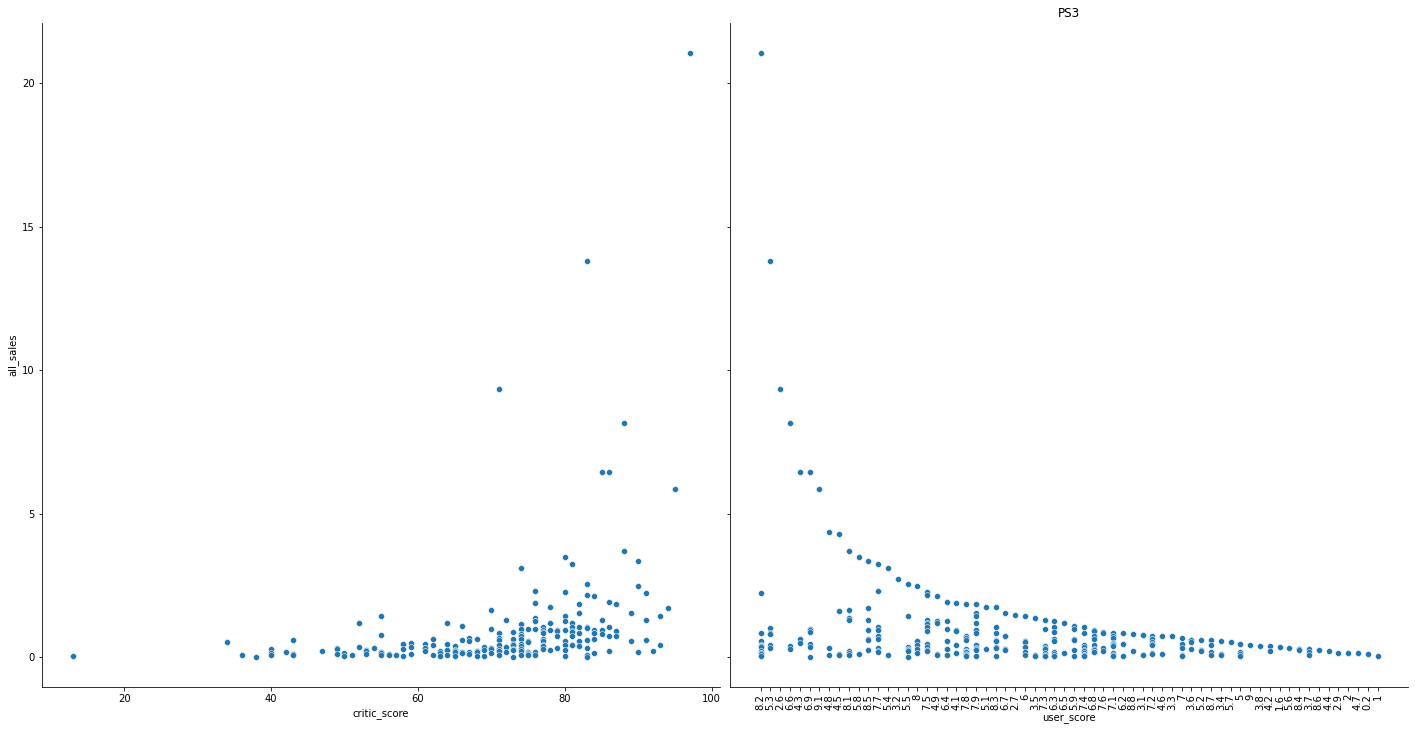

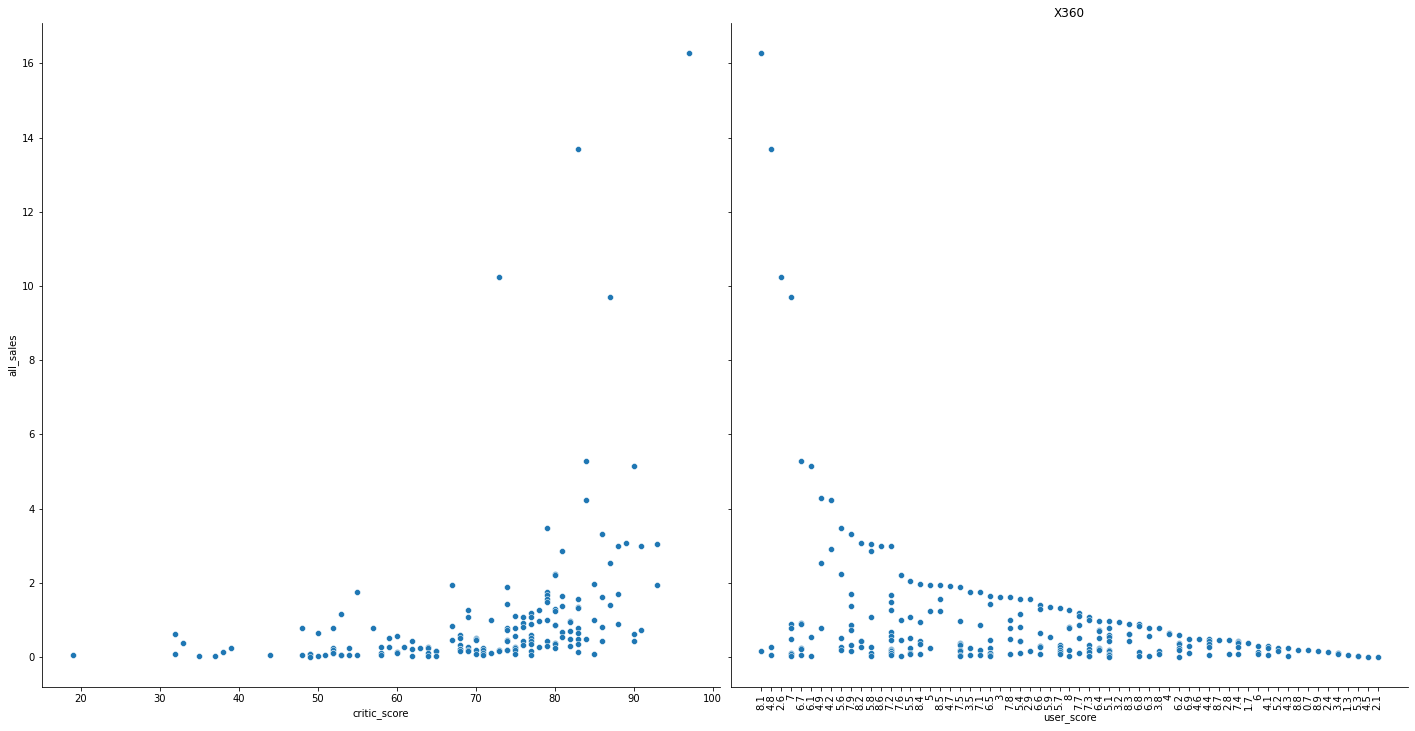

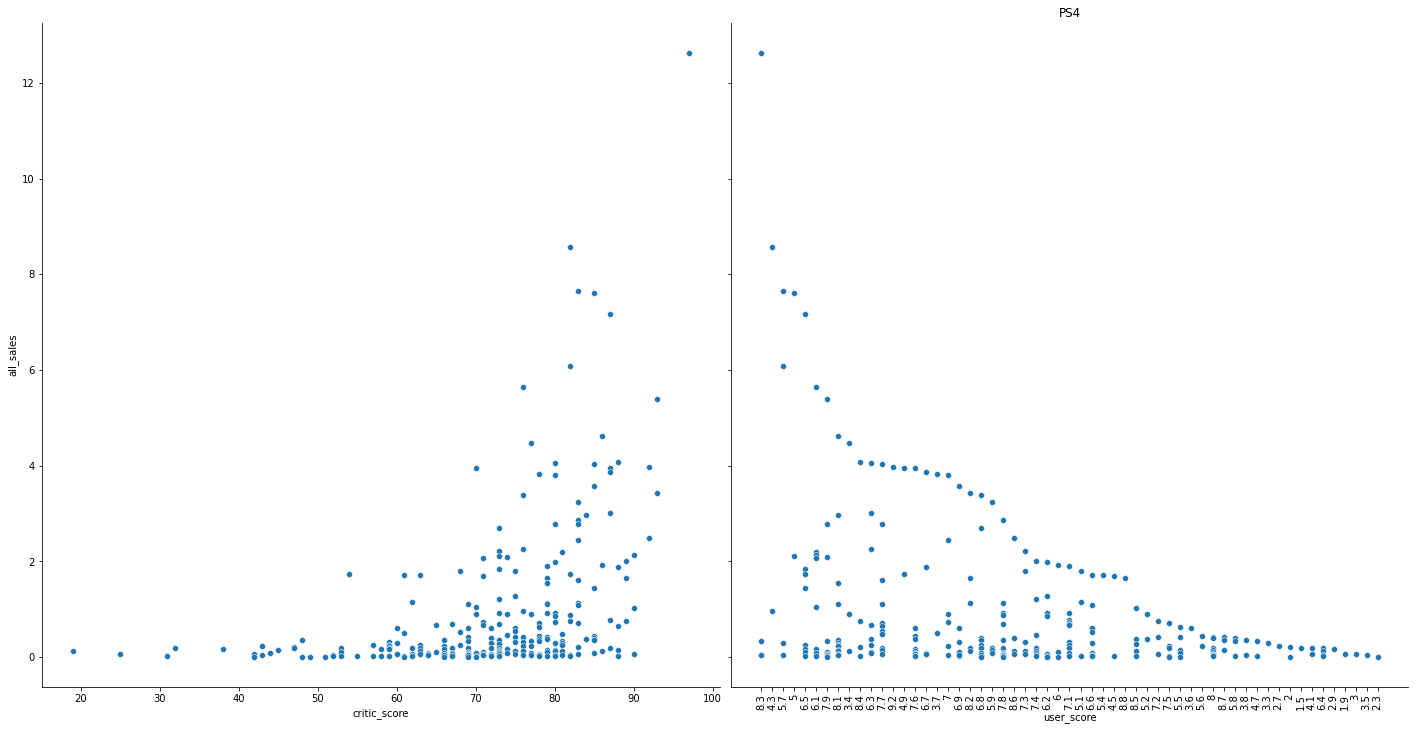

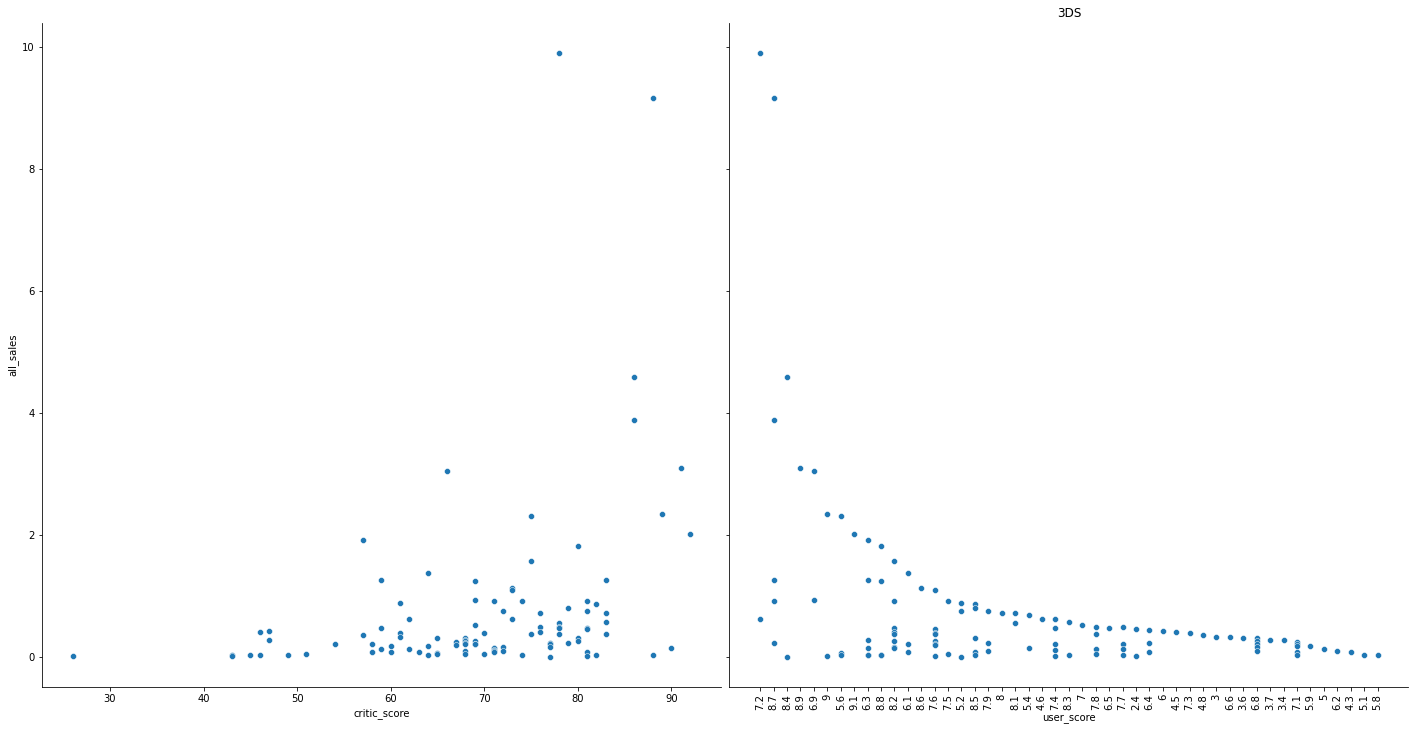

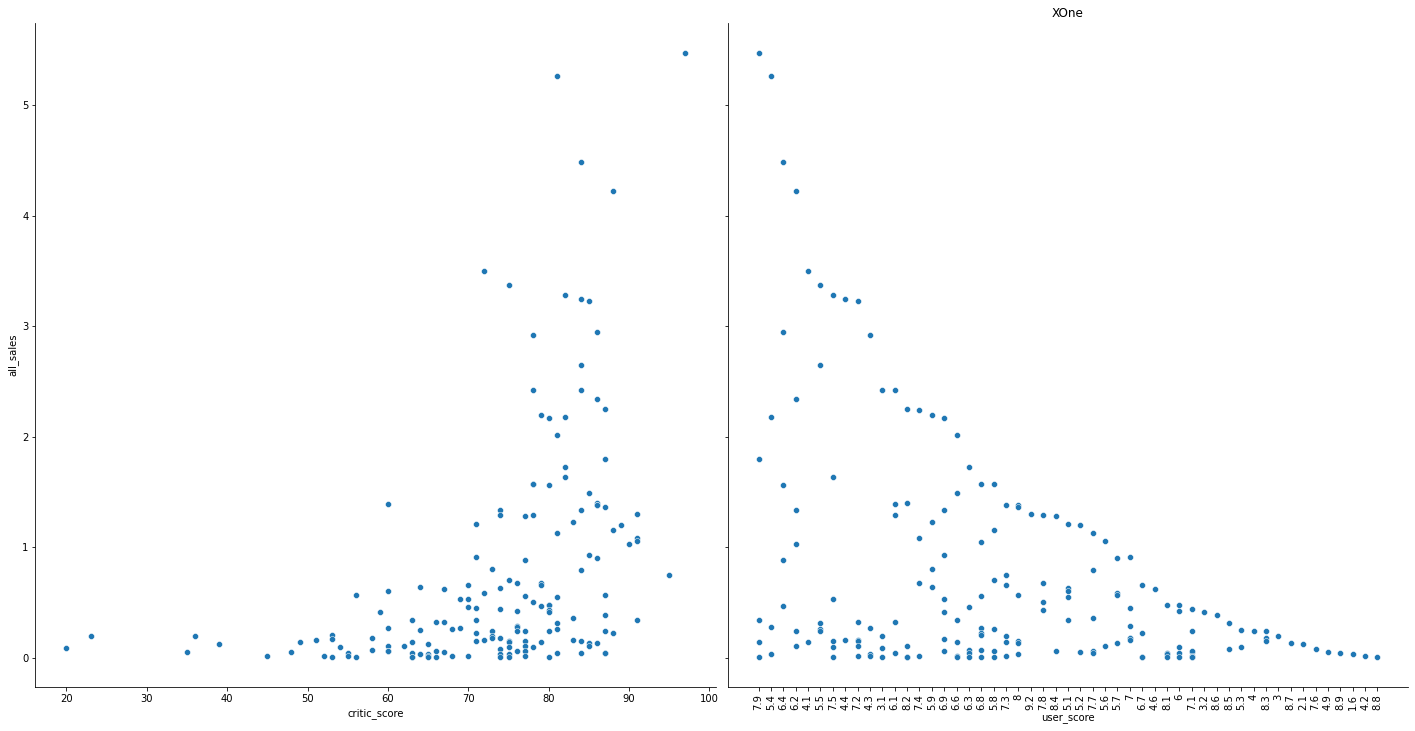

In [305]:
def platform(num):
    x = actual_data_platform_top5.query('platform == @num')
    return x

for index in actual_data_platform_top5['platform'].unique():
    platform_group = platform(index)
    sns.pairplot(platform_group, x_vars=['critic_score', 'user_score'], y_vars=['all_sales'], height=10, aspect=1) #size=7
    plt.title(index)
    plt.xticks(rotation=90)
    plt.show()

Тут можно разглядеть, что зависимости и правда очень слабые. У оценки пользователей и продаж вообще не можем сделать какой то вывод. У графиков оценки критиков и продаж хотя бы большинство значений продаж смещено вправо, в большую сторону оценки критиков.

### Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


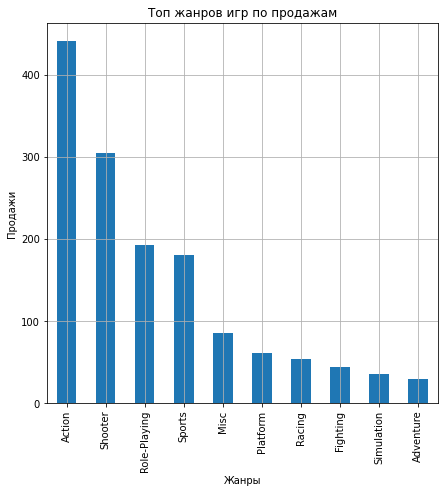

In [306]:
actual_data_top_genre = (actual_data.
                     pivot_table(index = ['genre'], values = ['all_sales'], aggfunc = 'sum').
                     sort_values('all_sales', ascending = False)).head(10)


display(actual_data_top_genre)
actual_data_top_genre.plot(figsize=(7, 7), kind='bar', grid=True, legend=False)
plt.title('Топ жанров игр по продажам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Мы видим, что экшены самые продоваемые жанры, после них идет шутеры. На третьем месты игры RPG и спорт, они идут почти рядом. Музыкальные, платформеры, симуляторы, гонки и драки - вообще отстают. Приключенческие игры самые не популярные.

<AxesSubplot:title={'center':'all_sales'}, xlabel='genre'>

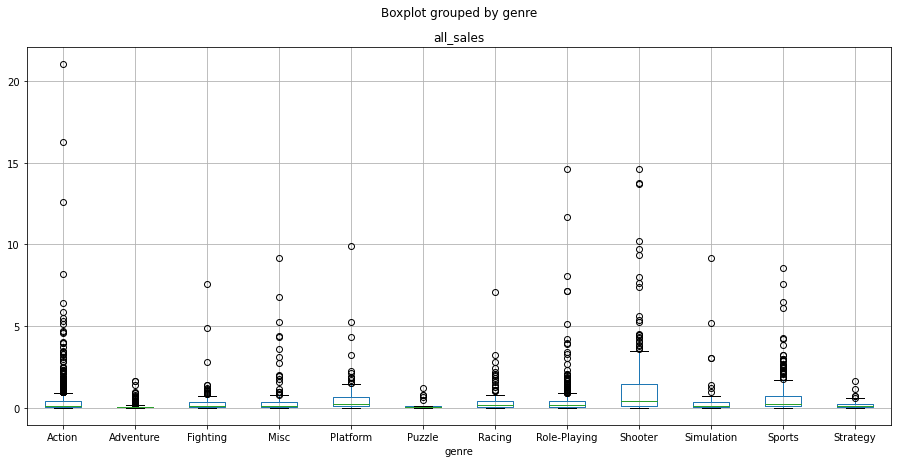

In [307]:
actual_data.boxplot(column='all_sales', by='genre', figsize=(15,7))
#plt.ylim(0,2)

(0.0, 3.0)

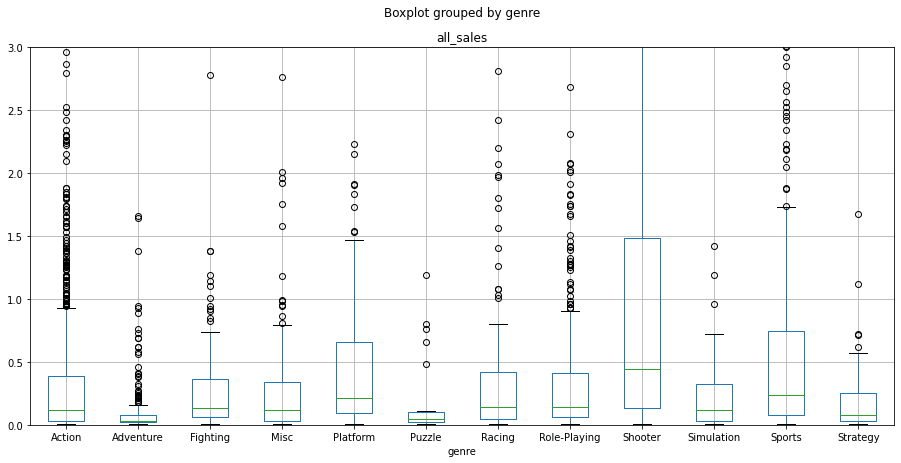

In [308]:
actual_data.boxplot(column='all_sales', by='genre', figsize=(15,7))
plt.ylim(0,3)

Выше анализ был все-таки не очень точным, это мы заметили сравнивая гистрограмму и ящики с усами. Попробуем сравнить медианные продажи, и выведим гистрограмму. Так как нам нужны стабильные жанры. Так как возможно такое, что лишь одна игра в конкретном жанре выстрелила и повысила тем самым продажи у конктреного жанра, а другие игры в этом жанре могут быть стремные и не прибыльные. 

,all_sales
genre,
Shooter,0.44
Sports,0.24
Platform,0.21
Role-Playing,0.14
Racing,0.14
Fighting,0.13
Action,0.12
Misc,0.12
Simulation,0.12


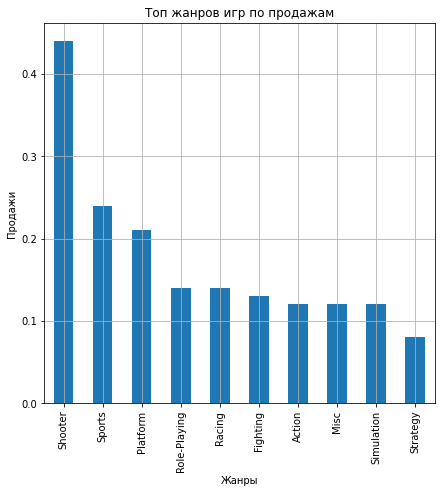

In [309]:
actual_data_top_genre = (actual_data.
                     pivot_table(index = ['genre'], values = ['all_sales'], aggfunc = 'median').
                     sort_values('all_sales', ascending = False)).head(10)
display(actual_data_top_genre)
actual_data_top_genre.plot(figsize=(7, 7), kind='bar', grid=True, legend=False)
plt.title('Топ жанров игр по продажам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Тут подвердилось то, что мы увидели на boxplot. Шутер стал более востребованным. А из-за того, что у action много выбросов, он был самым первым в первом анализе, сейчас же ушел чуть ли не в конец. Получается опираемся именно на шутеры, потом идет спорт и платформеры.

## Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
- Самые популярные жанры (топ-5). Поясните разницу.  
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


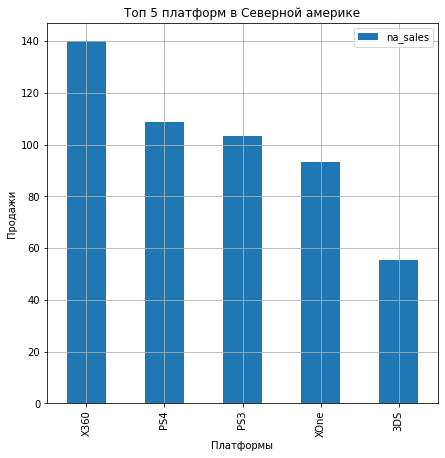

In [310]:
actual_data_top_NA = (actual_data.
                     pivot_table(index = ['platform'], values = ['na_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('na_sales', ascending = False)).head(5)
#actual_data_top_NA = actual_data_top_NA.reset_index()
display(actual_data_top_NA)
actual_data_top_NA.plot(figsize=(7, 7), kind='bar', grid=True, legend=True)
plt.title('Топ 5 платформ в Северной америке')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()


In [311]:
#actual_data_top_NA = actual_data_top_NA.reset_index()
#actual_data_top_NA.columns=['platform', 'na_sales']
#display(actual_data_top_NA)
#actual_data_top_NA.plot(x=kind='pie', subplot=True, autopct='1.0f%%')

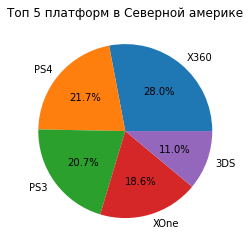

In [312]:
platform = 'X360', 'PS4', 'PS3', 'XOne', '3DS'
na_sales = [140.05, 108.74 , 103.38, 93.12, 55.31]
explode = (0, 0, 0, 0, 0)
plt.figure()
plt.pie(na_sales, labels=platform, explode=explode, autopct='%1.1f%%')
plt.title('Топ 5 платформ в Северной америке')
#plt.axis('equal')  
plt.show()

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


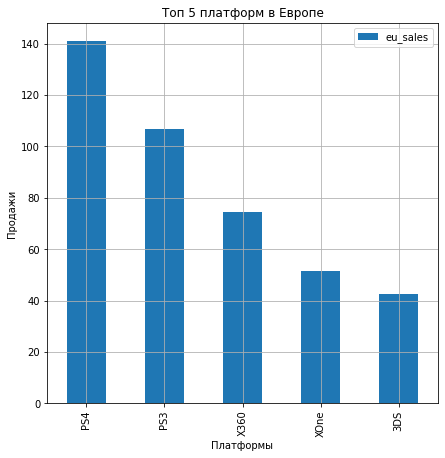

In [313]:
actual_data_top_EU = (actual_data.
                     pivot_table(index = ['platform'], values = ['eu_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('eu_sales', ascending = False)).head(5)
display(actual_data_top_EU)
actual_data_top_EU.plot(figsize=(7, 7), kind='bar', grid=True, legend=True)
plt.title('Топ 5 платформ в Европе')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

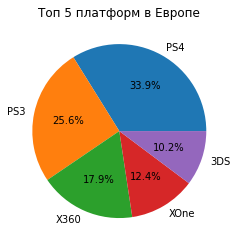

In [314]:
platform = 'PS4', 'PS3', 'X360', 'XOne', '3DS'
na_sales = [141.09, 106.86 , 74.52, 51.59, 42.64]
explode = (0, 0, 0, 0, 0)
plt.figure()
plt.pie(na_sales, labels=platform, explode=explode, autopct='%1.1f%%')
#plt.axis('equal') 
plt.title('Топ 5 платформ в Европе')
plt.show()

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


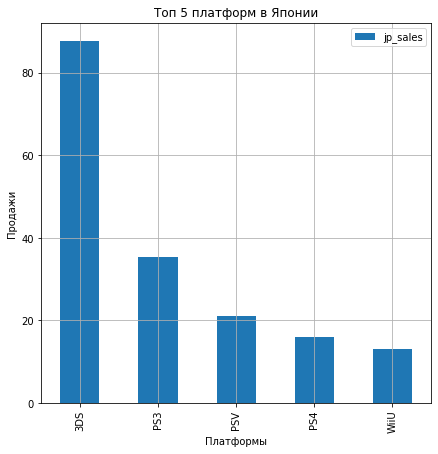

In [315]:
actual_data_top_JP = (actual_data.
                     pivot_table(index = ['platform'], values = ['jp_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('jp_sales', ascending = False)).head(5)
display(actual_data_top_JP)
actual_data_top_JP.plot(figsize=(7, 7), kind='bar', grid=True, legend=True)
plt.title('Топ 5 платформ в Японии')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

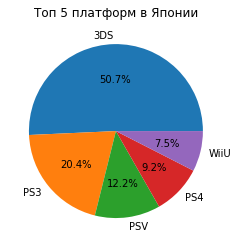

In [316]:
platform = '3DS', 'PS3', 'PSV', 'PS4', 'WiiU'
na_sales = [87.79, 35.29 , 21.04, 15.96, 13.01]
explode = (0, 0, 0, 0, 0)
plt.figure()
plt.pie(na_sales, labels=platform, explode=explode, autopct='%1.1f%%')
plt.title('Топ 5 платформ в Японии')
#plt.axis('equal')  
plt.show()

Не получилось у меня объеденить все пироги в один график большой. В любом случае получили, что в Северной Америке больше популярны Xb360(28%), в Европе - PS4(33.9%), в Японии это 3DS(50%). Проценты здесь это доли топ5 каждой платформы в отдельных регионах. Получается если в Северной Америке популярен X360, то в других регионах он либо вообще в топ не попал(В Японии), либо занимает лишь 17.9% в Европе. Также можно и сказать про PS4, если он самый окупаемый в Европе, то в других регионах он не так ценится. Хотя в Северной Америке доля PS4 близка к X360. 

Теперь посмотрим на жанры в каждом регионе.

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


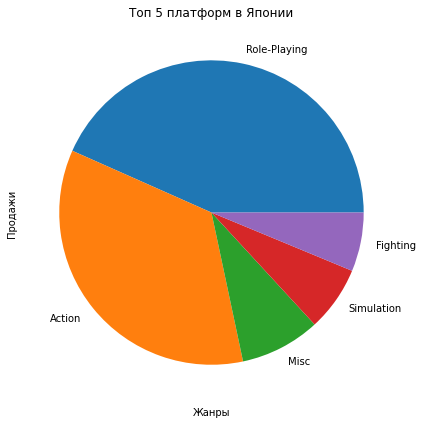

In [317]:
actual_data_top_JP = (actual_data.
                     pivot_table(index = ['genre'], values = ['jp_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('jp_sales', ascending = False)).head(5)
display(actual_data_top_JP)
actual_data_top_JP.plot(figsize=(7, 7), kind='pie', subplots=True, legend=False) #grid=True, legend=True)
plt.title('Топ 5 платформ в Японии')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


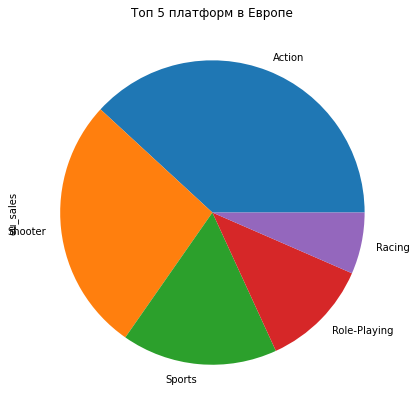

In [318]:
actual_data_top_EU = (actual_data.
                     pivot_table(index = ['genre'], values = ['eu_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('eu_sales', ascending = False)).head(5)
display(actual_data_top_EU)
actual_data_top_EU.plot(figsize=(7, 7), kind='pie', subplots=True, legend=False) #grid=True, legend=True)
plt.title('Топ 5 платформ в Европе')
plt.show()

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


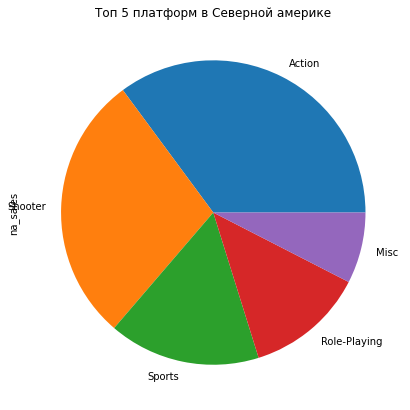

In [319]:
actual_data_top_NA = (actual_data.
                     pivot_table(index = ['genre'], values = ['na_sales'], aggfunc = 'sum'). #aggfunc = 'sum').
                     sort_values('na_sales', ascending = False)).head(5)
display(actual_data_top_NA)
actual_data_top_NA.plot(figsize=(7, 7), kind='pie', subplots=True, legend=False)  #grid=True, legend=True)
plt.title('Топ 5 платформ в Северной америке')

plt.show()

Получилось, что в Японии самый популярный жанр RPG, в Европе и Северной Америке - экшен. Но в той же Японии экшен почти не ушел по рейтингу с RPG, его там тоже любят.

In [320]:
#actual_data_top_JP = actual_data_top_JP.reset_index()
#actual_data_top_JP.columns = ['genre', 'jp_sales']
#actual_data_top_EU = actual_data_top_EU.reset_index()
#actual_data_top_EU.columns = ['genre', 'eu_sales']
#actual_data_top_NA = actual_data_top_NA.reset_index()
#actual_data_top_NA.columns = ['genre', 'na_sales']
#display(actual_data_top_JP)
#display(actual_data_top_EU)
#display(actual_data_top_NA)

In [321]:
#display(actual_data.head())

Теперь к рейтингу.

In [322]:
print(actual_data['rating'].unique())

['M' nan 'E' 'E10+' 'T']


«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.   
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.  
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.  
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  


In [323]:
esrb_eu = actual_data.pivot_table(index=['rating'], values='eu_sales', aggfunc = 'sum')
esrb_eu = esrb_eu.reset_index()
display(esrb_eu.head())

#esrb_eu.plot(x='rating', y='eu_sales', grid=True, figsize=(7, 7), style='o-')

,rating,eu_sales
0,E,113.03
1,E10+,55.37
2,M,193.96
3,T,52.96


In [324]:
esrb_jp = actual_data.pivot_table(index=['rating'], values='jp_sales', aggfunc = 'sum')
esrb_jp = esrb_jp.reset_index()
display(esrb_jp.head())

#esrb_jp.plot(x='rating', y='jp_sales', grid=True, figsize=(7, 7), style='o-')

,rating,jp_sales
0,E,28.33
1,E10+,8.19
2,M,21.20
3,T,26.02


In [325]:
esrb_na = actual_data.pivot_table(index=['rating'], values='na_sales', aggfunc = 'sum')
esrb_na = esrb_na.reset_index()
display(esrb_na.head())

#esrb_na.plot(x='rating', y='na_sales', grid=True, figsize=(7, 7), style='o-')

,rating,na_sales
0,E,114.37
1,E10+,75.70
2,M,231.57
3,T,66.02


  rating  eu_sales  jp_sales  na_sales
0      E    113.03     28.33    114.37
1   E10+     55.37      8.19     75.70
2      M    193.96     21.20    231.57
3      T     52.96     26.02     66.02


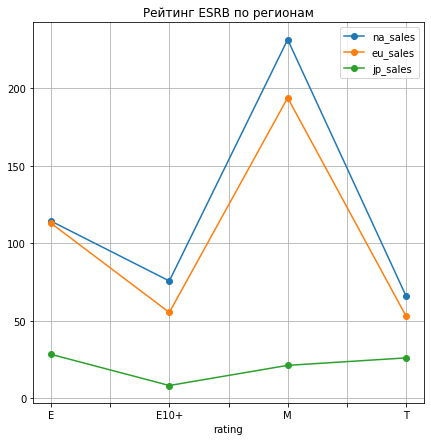

In [326]:
esrb_eu_jp_na = esrb_eu.merge(esrb_jp, on='rating')
esrb_eu_jp_na = esrb_eu_jp_na.merge(esrb_na, on='rating')
print(esrb_eu_jp_na)
esrb_eu_jp_na.plot(x='rating', y=['na_sales', 'eu_sales', 'jp_sales'] , grid=True, figsize=(7, 7), style='o-')
plt.title('Рейтинг ESRB по регионам')
plt.show()

Собственно что получили, просумировали рейтинги у каждого региона и вывели общий график. В Японии рейтинг не сильно влияет на продажи, и у рейтинга E самые большие продажи, но и M рядом. В других регионах видим, что рейтинг M дает самые большие продажи, они любят игры для взрослых, при этом у них самый непопулярный рейтинг T. А вот в Японии он второй после E.   
Получается в каждом регионе свои предпочтения на рейтинги.   

## Проверьте гипотезы
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Задайте самостоятельно пороговое значение alpha.  

Поясните:  
- Как вы сформулировали нулевую и альтернативную гипотезы;  
- Какой критерий применили для проверки гипотез и почему.

Сначала проверим первую гипотезу - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это получается мы проверяем нулевую гипотезу для двух незаввисимых выборок.

In [327]:
from scipy import stats as st

In [328]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   object 
 10  rating           1611 non-null   object 
 11  all_sales        2886 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 270.7+ KB


In [329]:
actual_data['user_score'] = actual_data['user_score'].astype(str).astype('float64')

In [330]:
#data['balcony'] = data['balcony'].fillna(0) 
actual_data['user_score'] = actual_data['user_score'].fillna(0)
print(actual_data['user_score'].isna().sum())

0


Я взяла метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var) для независимых выборок. Приминяем этот метод, потому что выборки не зависимы, есть две платформы, у них у каждой свой рейтинг, вне зависимости друг от друга. 

In [331]:
results = st.ttest_ind(
    actual_data.loc[actual_data['platform']=='PC', 'user_score'],
    actual_data.loc[actual_data['platform']=='XOne', 'user_score'], equal_var=False, nan_policy='omit')

alpha = .01
 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.06811033795099536
Не получилось отвергнуть нулевую гипотезу


Получается рейтинги и правда одинаковые у PC и XOne. 

Теперь вторую.  
Нулевая гипотеза - средний пользовательский рейтинг жанров Action и Sports одинаковый  
Альтернативная гипотеза - средний пользовательский рейтинг жанров Action и Sports различается

Выбрала такие гипотезы, потому что нулевая это всегда равенсто между выборками, а альтернативная гипотеза это всегда про неравенство и сравнение. 

In [332]:
results = st.ttest_ind(
    actual_data.loc[actual_data['genre']=='Action', 'user_score'],
    actual_data.loc[actual_data['genre']=='Sports', 'user_score'], equal_var=False, nan_policy='omit')

alpha = .05
 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.014166975726904845
Отвергаем нулевую гипотезу


А здесь выходит наоброт, гипотезу отвергаем нулевую, это значит, что средний пользовательский рейтинг у экшена и спорта не одниковый и различается. 

## Напишите общий вывод

Самые прибыльные игры на такие консоли PS4, PS3, X360, 3DS, XOne.   
Самая стабильная платформа на которую лучше опираться это  X360.   
Выпускают новые консоли можно сказать каждый год, а старые платформы получается исчезают за 8-9 лет. Т.е. старичков можно поддерживать, еще продавать на них игры, но лучше опираться на новейшие модели.   
Надо учитывать рейтинг критиков по играм, так как чем они выше, тем выше и продажи. У рейтингов пользователей такой закономерности не прослеживается.  
Шутеры, спортивные игры и платформеры наш топ в выборе жанров + RPG.   
Разные регионы тоже влияют на продажу.У разных регионов свои предпочтения как и по жанрам, так и по платформам. При этом еще и различаются предпочтения на рейтинги ESRB. (В Северной Америке больше популярны Xb360, в Европе - PS4, в Японии это 3DS. в Японии самый популярный жанр RPG (недалеко и экшен), в Европе и Северной Америке - экшен. В Японии рейтинг не сильно влияет на продажи. В других регионах рейтинг M дает самые большие продажи, они любят игры для взрослых, при этом у них самый непопулярный рейтинг T.)